Saving 8. Student Performance Prediction.csv to 8. Student Performance Prediction (7).csv
🔹 First 5 rows of data:
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0    

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


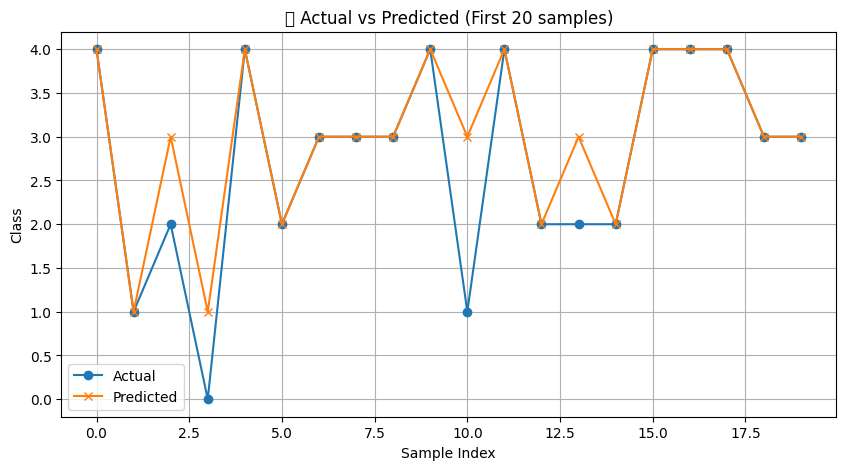


🔮 Let's predict for a new student!
📝 Enter values for the following features:
StudentID: 1004
Age: 19
Gender: 1
Ethnicity: 3
ParentalEducation: 4
StudyTimeWeekly: 33
Absences: 2
Tutoring: 14
ParentalSupport: 14
Extracurricular: 6
Sports: 7
Music: 81
Volunteering: 12
GPA: 9.7

📢 Predicted Grade/Class for new student: 0.0


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


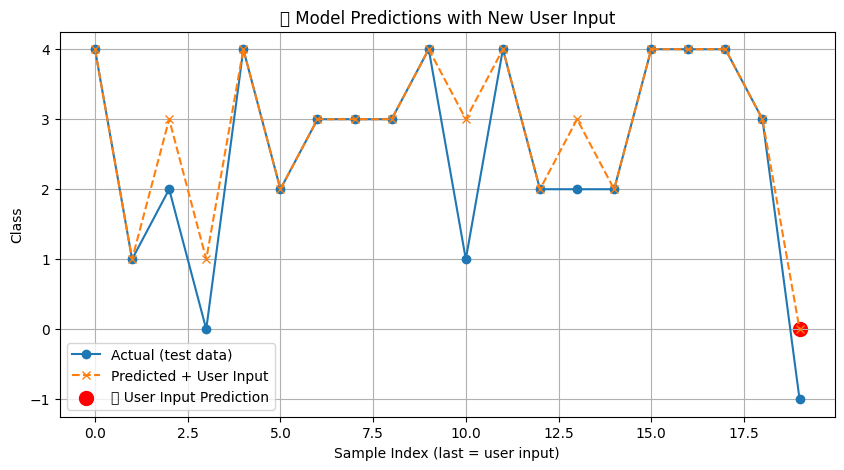

In [12]:
# ✅ Step 1: Upload the dataset
from google.colab import files
uploaded = files.upload()

# ✅ Step 2: Load and view the dataset
import pandas as pd

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("🔹 First 5 rows of data:")
print(df.head())

# ✅ Step 3: Encode categorical data
from sklearn.preprocessing import LabelEncoder

df_clean = df.copy()
for column in df_clean.columns:
    if df_clean[column].dtype == 'object':
        le = LabelEncoder()
        df_clean[column] = le.fit_transform(df_clean[column])

print("\n🔹 Cleaned dataset:")
print(df_clean.head())

# ✅ Step 4: Define features and target
target_column = 'GradeClass'  # Change if needed
if target_column not in df_clean.columns:
    raise ValueError("❌ Target column not found!")

X = df_clean.drop(columns=[target_column])
y = df_clean[target_column]

# ✅ Step 5: Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 6: Train the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# ✅ Step 7: Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("\n📊 Evaluation Metrics:")
print(f"✅ Accuracy:  {accuracy:.2f}")
print(f"✅ Precision: {precision:.2f}")
print(f"✅ Recall:    {recall:.2f}")
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# ✅ Step 8: Plot actual vs predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(list(y_test)[:20], label="Actual", marker='o')
plt.plot(list(y_pred)[:20], label="Predicted", marker='x')
plt.title("📈 Actual vs Predicted (First 20 samples)")
plt.xlabel("Sample Index")
plt.ylabel("Class")
plt.legend()
plt.grid(True)
plt.show()

# ✅ Step 9: User Input Prediction
print("\n🔮 Let's predict for a new student!")

# Show all required columns to the user
print("📝 Enter values for the following features:")
user_input = []
for col in X.columns:
    value = input(f"{col}: ")
    user_input.append(float(value))  # You can use int(value) if appropriate

# Convert to DataFrame
import numpy as np
sample_df = pd.DataFrame([user_input], columns=X.columns)

# Predict
user_prediction = model.predict(sample_df)[0]
print(f"\n📢 Predicted Grade/Class for new student: {user_prediction}")

# ✅ Step 10: Plot with new prediction included
y_test_list = list(y_test)[:19]      # first 19 actual test labels
y_pred_list = list(y_pred)[:19]      # first 19 predicted test labels

# Append user prediction
y_test_list.append(-1)               # -1 to represent unknown actual class
y_pred_list.append(user_prediction)  # predicted class of user input

plt.figure(figsize=(10, 5))
plt.plot(y_test_list, label="Actual (test data)", marker='o', linestyle='-')
plt.plot(y_pred_list, label="Predicted + User Input", marker='x', linestyle='--')

# Highlight user input prediction
plt.scatter([len(y_pred_list) - 1], [user_prediction], color='red', s=100, label="🔴 User Input Prediction")

plt.title("📈 Model Predictions with New User Input")
plt.xlabel("Sample Index (last = user input)")
plt.ylabel("Class")
plt.legend()
plt.grid(True)
plt.show()
